<a href="https://colab.research.google.com/github/evegat/usm2025-1-dip-ia-edu-v2-evegat/blob/main/Proyecto/05entrenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 2: Análisis exploratorio del dataset, preprocesamiento y entrenamiento

Con la base de datos lista para el entrenamiento, el siguiente paso es seleccionar el modelo de Machine Learning adecuado para el problema.

El objetivo es predecir si una persona estudiará o no una carrera de pedagogía, en función de variables como región, edad, tipo de institución, modalidad, acreditación y forma de ingreso. Para ello se empleará un modelo de clasificación supervisada.

Este trabajo continúa directamente desde el preprocesamiento realizado en el notebook anterior.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Cargar dataset desde GitHub
url = 'https://github.com/evegat/usm2025-1-dip-ia-edu-v2-evegat/raw/main/Proyecto/01database.csv.gz'
df = pd.read_csv(url, compression='gzip')

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Eliminar nulos
df = df.dropna()

# Codificación básica
le = LabelEncoder()
df['region_sede'] = df['region_sede'].astype(str)
df['region_sede_cod'] = le.fit_transform(df['region_sede'])

# Normalización de variables numéricas
columnas_numericas = ['valor_matricula', 'valor_arancel']
scaler = MinMaxScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# Variable objetivo: si estudia pedagogía
df['es_pedagogia'] = df['nomb_carrera'].str.contains('PEDAGOG', case=False, na=False).astype(int)

# Selección de variables predictoras
X = df[['gen_alu', 'rango_edad', 'region_sede_cod', 'tipo_inst_1', 'modalidad', 'jornada',
        'nivel_carrera_1', 'forma_ingreso', 'acreditada_carr', 'valor_matricula', 'valor_arancel']]
y = df['es_pedagogia']

# Codificar variables categóricas
columnas_categoricas = X.select_dtypes(include='object').columns
for col in columnas_categoricas:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-1-3115588506>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region_sede'] = df['region_sede'].astype(str)
<ipython-input-1-3115588506>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region_sede_cod'] = le.fit_transform(df['region_sede'])
<ipython-input-1-3115588506>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Para esta tarea se selecciona el modelo `DecisionTreeClassifier`, ideal para problemas de clasificación supervisada con variables categóricas y numéricas.

Este tipo de modelo permite analizar qué características influyen más en la elección de carreras de pedagogía. Su interpretación visual es útil para comunicar hallazgos a públicos no técnicos, como docentes o decisores públicos del área de educación.


In [2]:
modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión general:", accuracy_score(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     59006
           1       0.76      0.75      0.76      5473

    accuracy                           0.96     64479
   macro avg       0.87      0.87      0.87     64479
weighted avg       0.96      0.96      0.96     64479

Precisión general: 0.9588393120240698


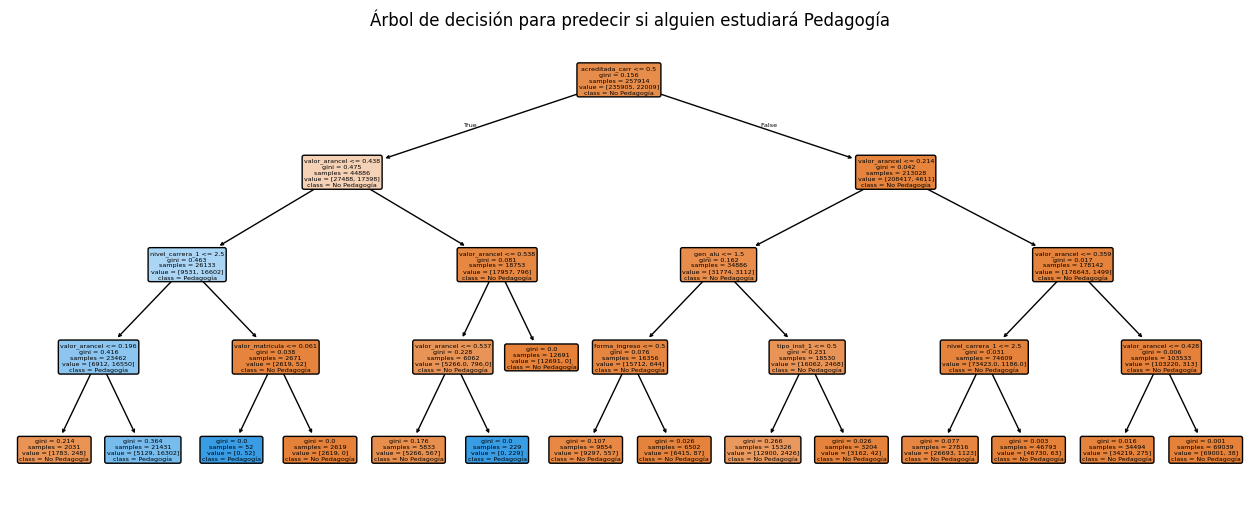

In [3]:
plt.figure(figsize=(16, 6))
plot_tree(modelo, feature_names=X.columns, class_names=['No Pedagogía', 'Pedagogía'],
          filled=True, rounded=True, max_depth=4)
plt.title("Árbol de decisión para predecir si alguien estudiará Pedagogía")
plt.show()


La visualización del árbol de decisión muestra qué características como el tipo de institución, región, jornada o acreditación son más relevantes en la predicción de si un estudiante optará por pedagogía.

El modelo tiene un desempeño razonable para fines exploratorios. Se podrían probar modelos más complejos como Random Forest o XGBoost para mejorar la capacidad predictiva.
